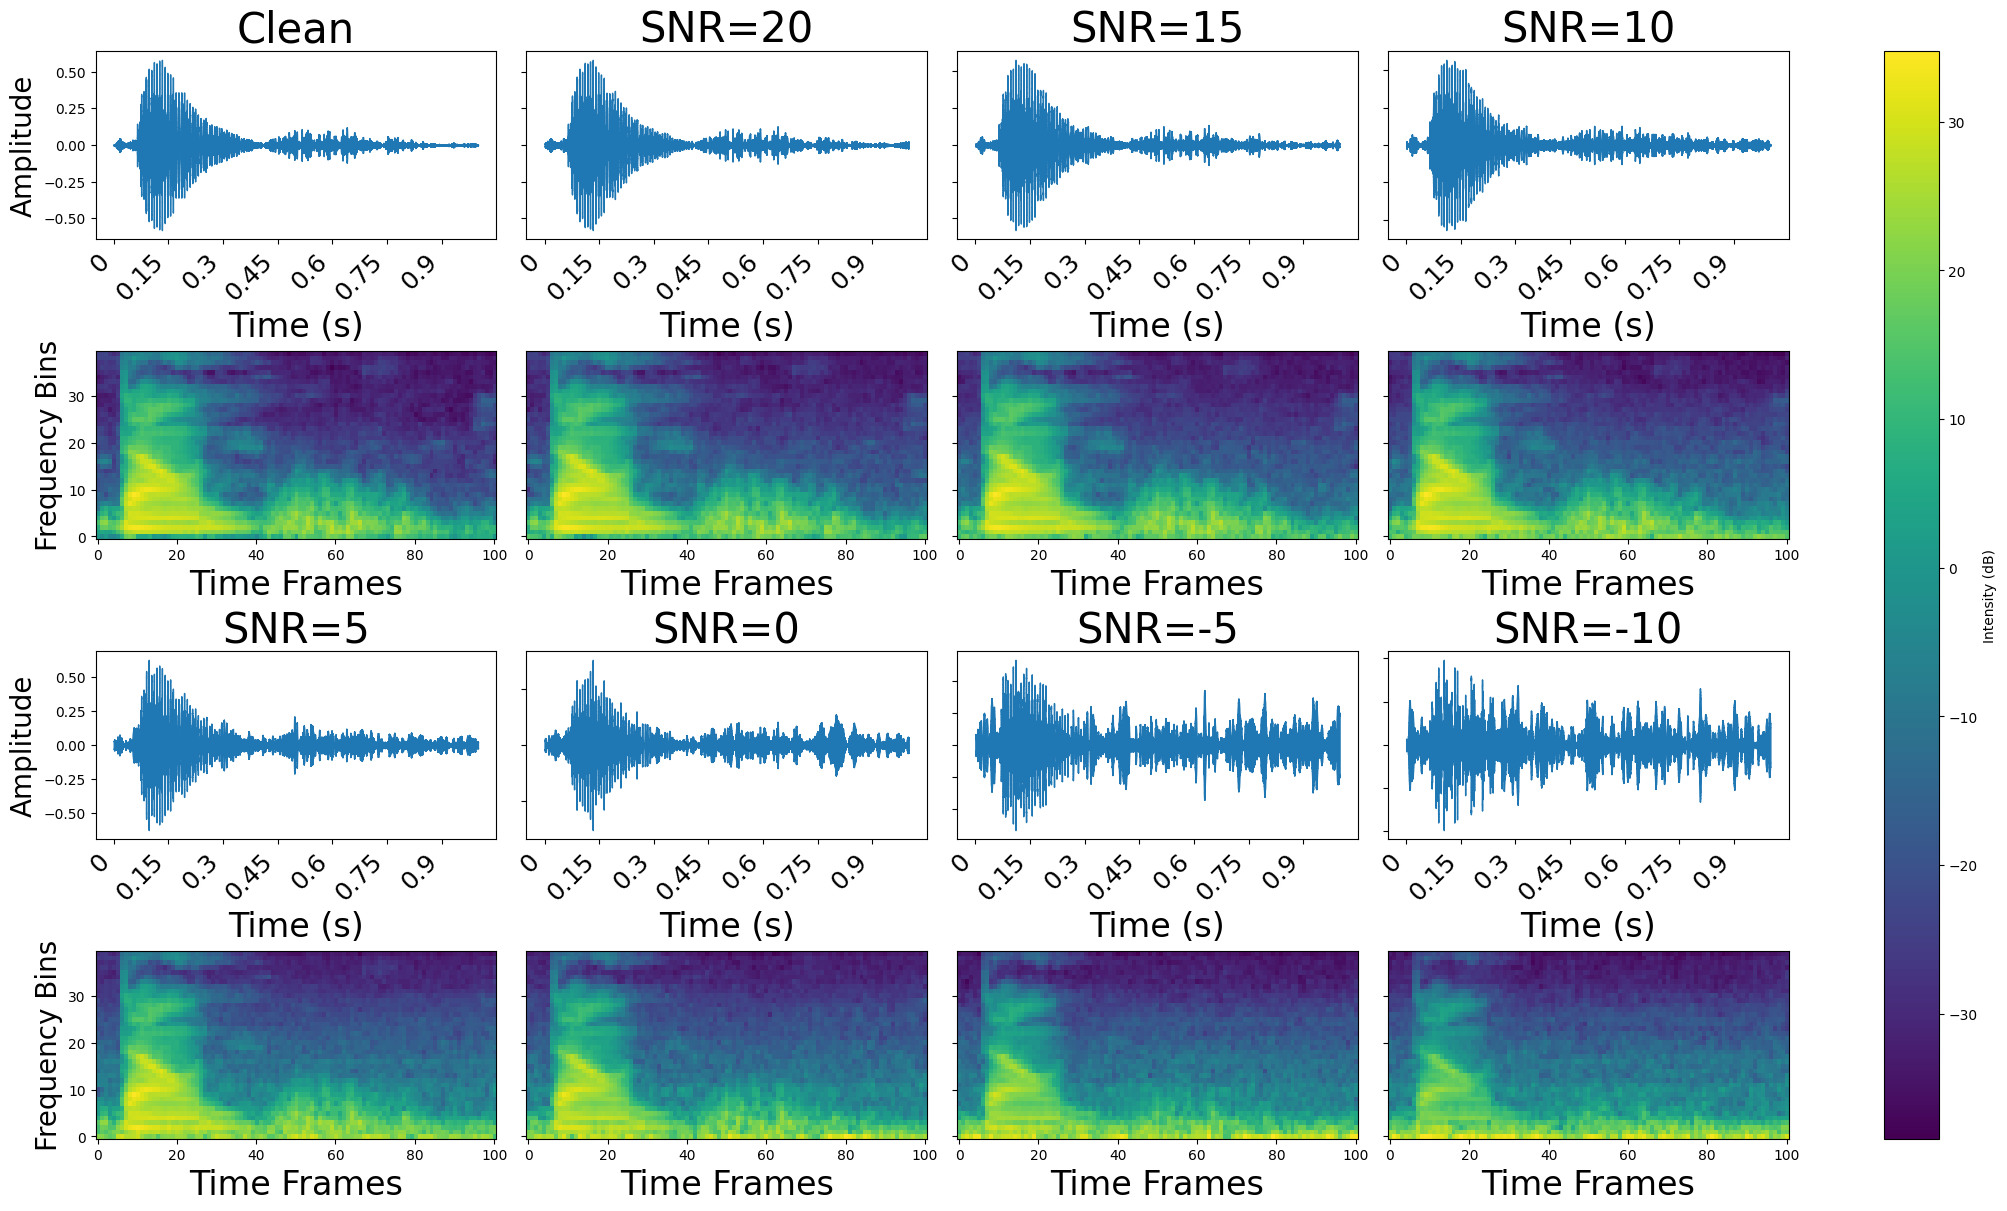

In [1]:
import librosa
import librosa.display
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_audio_and_spectrogram(wav_files, spec_files, titles):
    """
    对于给定的.wav文件和频谱图文件数组，按每行最多四个图像排列绘制它们的音频波形和频谱图，
    每超过四个图像自动换行，并为每个图设置特定标题。
    
    参数:
        wav_files (list[str]): .wav音频文件路径列表。
        spec_files (list[str]): 包含频谱图张量的文件路径列表。
        titles (list[str]): 每幅图的标题列表。
    """
    if len(wav_files) != len(spec_files) or len(wav_files) != len(titles):
        raise ValueError("音频文件、频谱图文件和标题的数量必须相同")
    
    num_files = len(wav_files)
    cols_per_row = 4
    rows = int(np.ceil(num_files / cols_per_row)) * 2  # 每个文件一对图，乘以2
    fig, axs = plt.subplots(rows, cols_per_row, figsize=(20, rows * 3), constrained_layout=True)

    for i, (wav_file, spec_file, title) in enumerate(zip(wav_files, spec_files, titles)):
        row = 2 * (i // cols_per_row)  # 计算当前图应处在哪一行
        col = i % cols_per_row        # 计算当前图应处在哪一列

        # 读取音频文件并绘制波形图
        audio, sr = librosa.load(wav_file, sr=None)
        ax = axs[row, col] if rows > 1 else axs[col]
        librosa.display.waveshow(audio, sr=sr, ax=ax)
        ax.set_title(title, fontsize=30)  # 设置标题
        ax.set_xlabel('Time (s)',fontsize=24)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",fontsize=18)
        if col == 0:
            ax.set_ylabel('Amplitude',fontsize=20)
        else:
            ax.set_yticklabels([])  # 隐藏非最左边图的y轴标签

        # 加载并绘制频谱图
        tensor = torch.load(spec_file)
        if tensor.shape != (40, 1, 101):
            raise ValueError(f"Tensor的维度不符合预期，应为 (40, 1, 101) 在文件 {spec_file}")
        
        spectrogram = tensor.squeeze()
        ax = axs[row+1, col] if rows > 1 else axs[col]
        im = ax.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
        ax.set_xlabel('Time Frames',fontsize=24)
        if col == 0:
            ax.set_ylabel('Frequency Bins',fontsize=20)
        else:
            ax.set_yticklabels([])

    # 添加全局色标
    fig.colorbar(im, ax=axs, location='right', label='Intensity (dB)')
    plt.show()

    
# 使用例子：
N=1
t="Test"
# snr = [20,15,10,5,0]
snr = [20,15,10,5,0,-5,-10]
titles = ["Clean"] + [f"SNR={s}" for s in snr]
file_name = "down_cd7f8c1b_nohash_2"
wav_files = [f'dataset/google_noisy/NGSCD/{t}/clean{N}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[0]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[1]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[2]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[3]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[4]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[5]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[6]}/{file_name}.wav',
#             f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[7]}/{file_name}.wav'
            ]

spec_files = [f'dataset/google_noisy/NGSCD_SPEC/{t}/clean{N}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[0]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[1]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[2]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[3]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[4]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[5]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[6]}/{file_name}.pt',
#              f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[7]}/{file_name}.pt'
             ]
plot_audio_and_spectrogram(wav_files, spec_files,titles)


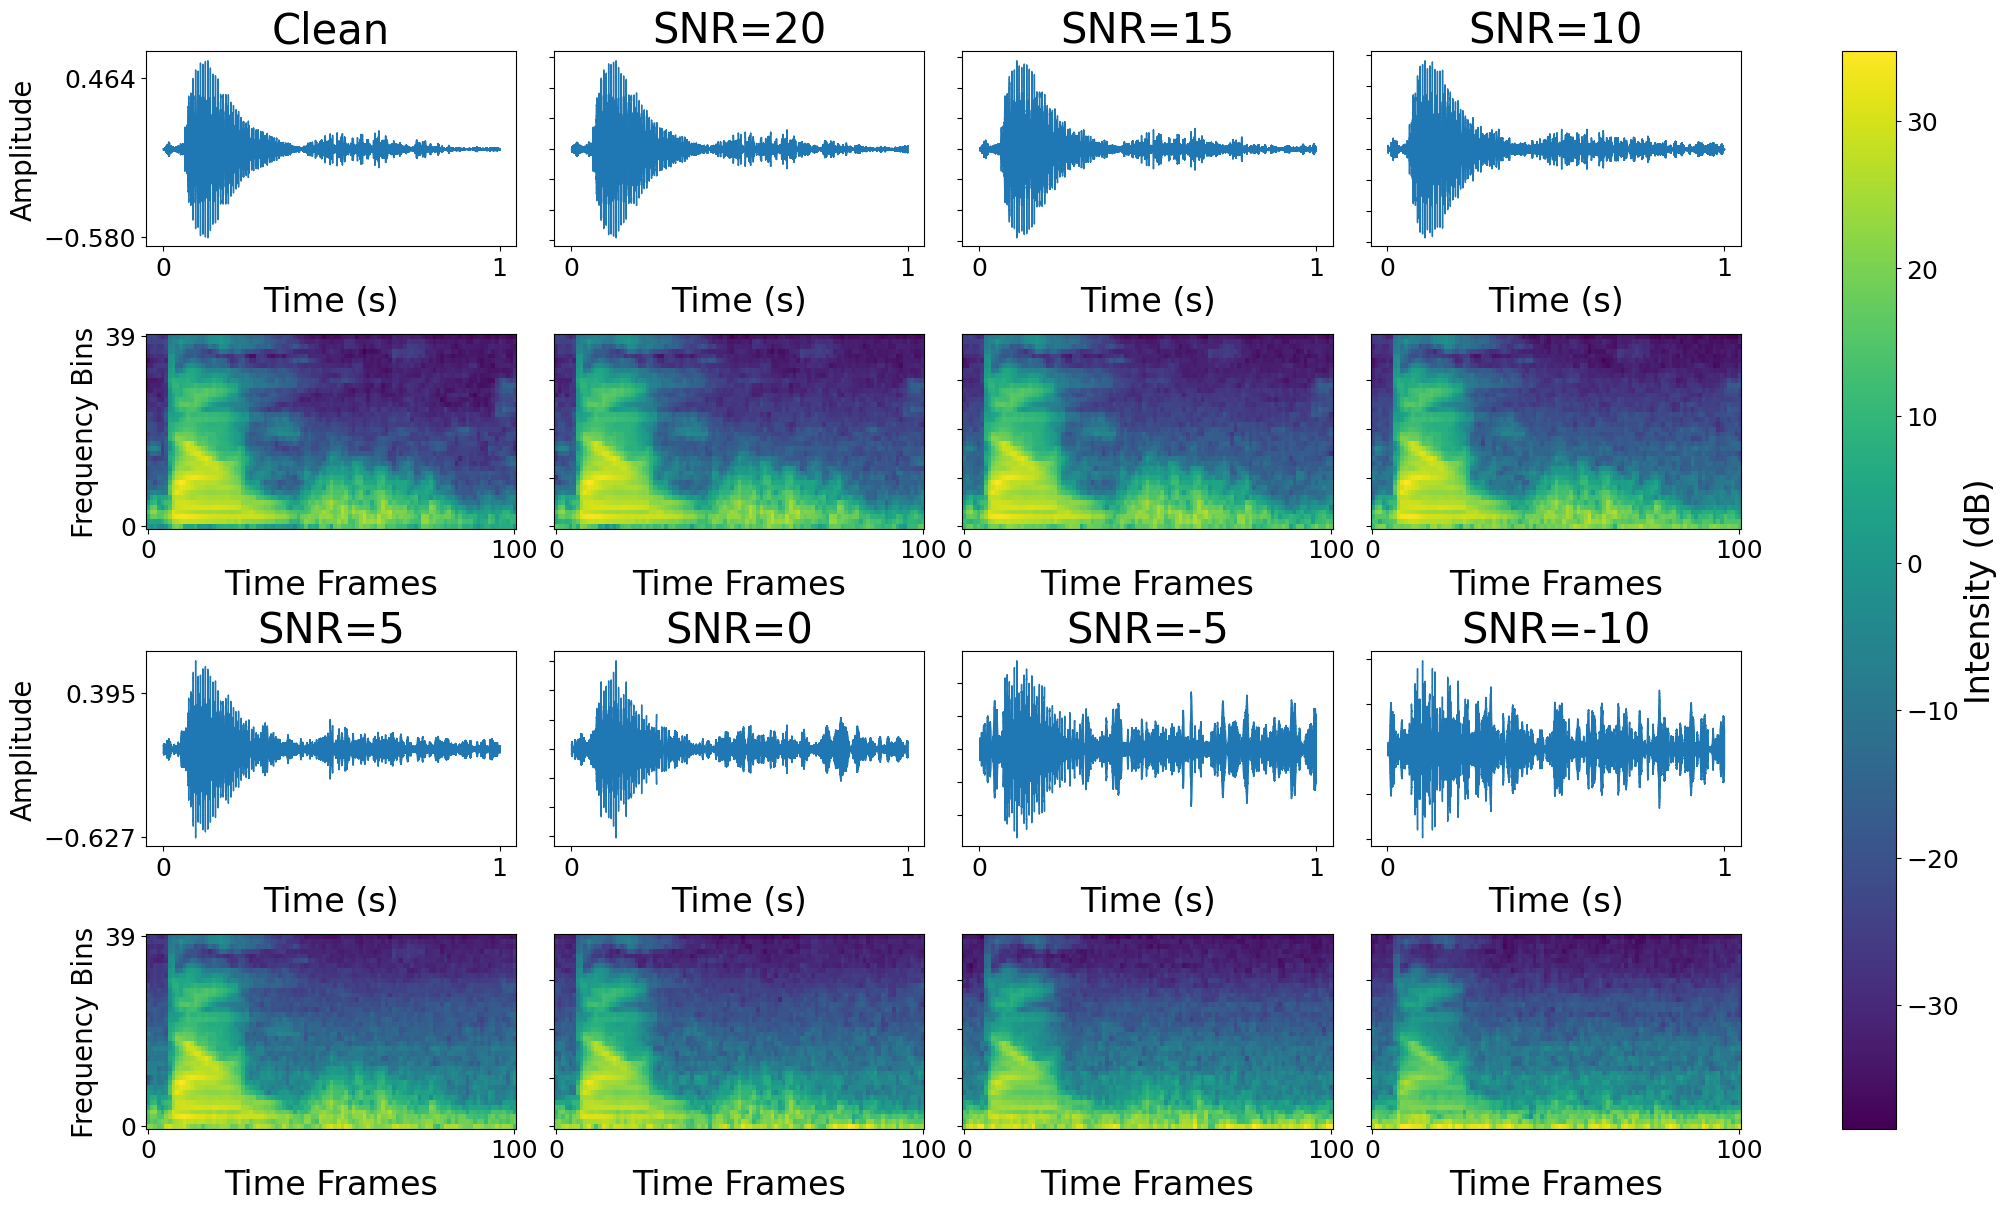

In [5]:
import librosa
import librosa.display
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_audio_and_spectrogram(wav_files, spec_files, titles):
    """
    对于给定的.wav文件和频谱图文件数组，按每行最多四个图像排列绘制它们的音频波形和频谱图，
    每超过四个图像自动换行，并为每个图设置特定标题。
    
    参数:
        wav_files (list[str]): .wav音频文件路径列表。
        spec_files (list[str]): 包含频谱图张量的文件路径列表。
        titles (list[str]): 每幅图的标题列表。
    """
    if len(wav_files) != len(spec_files) or len(wav_files) != len(titles):
        raise ValueError("音频文件、频谱图文件和标题的数量必须相同")
    
    num_files = len(wav_files)
    cols_per_row = 4
    rows = int(np.ceil(num_files / cols_per_row)) * 2  # 每个文件一对图，乘以2
    fig, axs = plt.subplots(rows, cols_per_row, figsize=(20, rows * 3), constrained_layout=True)

    for i, (wav_file, spec_file, title) in enumerate(zip(wav_files, spec_files, titles)):
        row = 2 * (i // cols_per_row)  # 计算当前图应处在哪一行
        col = i % cols_per_row        # 计算当前图应处在哪一列

        # 读取音频文件并绘制波形图
        audio, sr = librosa.load(wav_file, sr=None)
        ax = axs[row, col] if rows > 1 else axs[col]
        librosa.display.waveshow(audio, sr=sr, ax=ax)
        ax.set_title(title, fontsize=30)  # 设置标题
        ax.set_xlabel('Time (s)', fontsize=24)
        ax.set_xticks(np.linspace(0, len(audio) / sr, 2))  # 
        plt.setp(ax.get_xticklabels(), fontsize=18)
        if col == 0:
            ax.set_ylabel('Amplitude', fontsize=20)
            ax.set_yticks(np.linspace(min(audio), max(audio), 2))  # 
            plt.setp(ax.get_yticklabels(), fontsize=18)
        else:
            ax.set_yticklabels([])  # 隐藏非最左边图的Y轴标签

        # 加载并绘制频谱图
        tensor = torch.load(spec_file)
        if tensor.shape != (40, 1, 101):
            raise ValueError(f"Tensor的维度不符合预期，应为 (40, 1, 101) 在文件 {spec_file}")
        
        spectrogram = tensor.squeeze()
        ax = axs[row+1, col] if rows > 1 else axs[col]
        im = ax.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
        ax.set_xlabel('Time Frames', fontsize=24)
        ax.set_xticks(np.linspace(0, spectrogram.shape[1] - 1, 2))  #
        plt.setp(ax.get_xticklabels(), fontsize=18)
        if col == 0:
            ax.set_ylabel('Frequency Bins', fontsize=20)
            ax.set_yticks(np.linspace(0, spectrogram.shape[0] - 1, 2))  # 
            plt.setp(ax.get_yticklabels(), fontsize=18)
        else:
            ax.set_yticklabels([])

    # 添加全局色标，并设置色标标签的字体大小
    cbar = fig.colorbar(im, ax=axs, location='right', label='Intensity (dB)')
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Intensity (dB)', fontsize=24)
    plt.show()

# 使用例子：
N=1
t="Test"
# snr = [20,15,10,5,0]
snr = [20,15,10,5,0,-5,-10]
titles = ["Clean"] + [f"SNR={s}" for s in snr]
file_name = "down_cd7f8c1b_nohash_2"
wav_files = [f'dataset/google_noisy/NGSCD/{t}/clean{N}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[0]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[1]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[2]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[3]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[4]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[5]}/{file_name}.wav',
            f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[6]}/{file_name}.wav',
#             f'dataset/google_noisy/NGSCD/{t}/N{N}_SNR{snr[7]}/{file_name}.wav'
            ]

spec_files = [f'dataset/google_noisy/NGSCD_SPEC/{t}/clean{N}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[0]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[1]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[2]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[3]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[4]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[5]}/{file_name}.pt',
             f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[6]}/{file_name}.pt',
#              f'dataset/google_noisy/NGSCD_SPEC/{t}/N{N}_SNR{snr[7]}/{file_name}.pt'
             ]
plot_audio_and_spectrogram(wav_files, spec_files, titles)